<a href="https://colab.research.google.com/github/jeffkayser2/deep-learning-with-python-notebooks/blob/master/DL_Book_Chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255



In [7]:
train_images_with_noise_channels =  np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zero_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model



In [9]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zero_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7024 - loss: 1.0128 - val_accuracy: 0.9154 - val_loss: 0.2783
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9122 - loss: 0.2859 - val_accuracy: 0.9389 - val_loss: 0.1995
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9469 - loss: 0.1706 - val_accuracy: 0.9556 - val_loss: 0.1480
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9604 - loss: 0.1236 - val_accuracy: 0.9597 - val_loss: 0.1390
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9726 - loss: 0.0894 - val_accuracy: 0.9497 - val_loss: 0.1668
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9797 - loss: 0.0644 - val_accuracy: 0.9603 - val_loss: 0.1315
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9853 - loss: 0.0460 - val_accuracy: 0.9673 - val_loss: 0.1198
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9896 - loss: 0.0330 - val_a

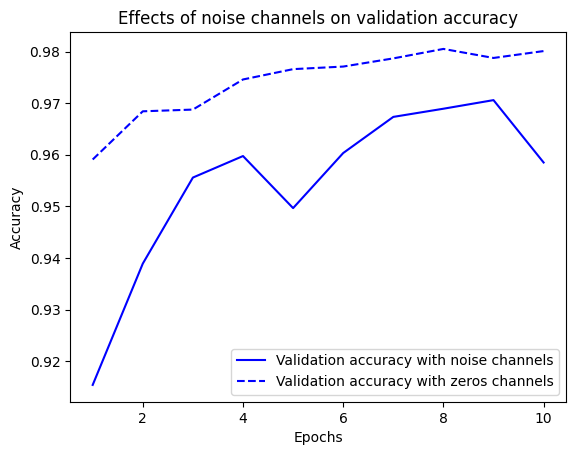

In [10]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
        label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
        label="Validation accuracy with zeros channels")
plt.title("Effects of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


In [11]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)



Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1044 - loss: 2.3318 - val_accuracy: 0.0961 - val_loss: 2.3076
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1198 - loss: 2.2965 - val_accuracy: 0.1037 - val_loss: 2.3132
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1279 - loss: 2.2895 - val_accuracy: 0.1032 - val_loss: 2.3174
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1381 - loss: 2.2770 - val_accuracy: 0.0990 - val_loss: 2.3249
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1557 - loss: 2.2605 - val_accuracy: 0.1026 - val_loss: 2.3353
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1739 - loss: 2.2365 - val_accuracy: 0.1021 - val_loss: 2.3503
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1868 - loss: 2.2158 - val_accuracy: 0.1004 - val_loss: 2.3639
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2061 - loss: 2.1837 - 